In [58]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas import DataFrame, Series

In [59]:
Base_Aloe_Ferox_Dataset = pd.ExcelFile('BaseSet.xlsx')

In [60]:
Base_Set = {}
for sheet in Base_Aloe_Ferox_Dataset.sheet_names:
    df = Base_Aloe_Ferox_Dataset.parse(sheet)
    Base_Set[sheet] = df

In [61]:
flowers_base = Base_Set["FLOWERS"]
buds_base = Base_Set["BUDS"]
fruit_base = Base_Set["FRUIT"]
No_Evidence_Base = Base_Set["No Evidence"]

In [62]:
flowers_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,field:phenology (foa)
0,9865839,2017-06-24 3:22:22 PM SAST,2017-06-24,2017-06-24 13:22:22 UTC,Africa/Johannesburg,764003,gabriel_15,NaN,2018-02-15 07:32:45 UTC,2018-06-07 16:08:59 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
1,10787160,2011-07-15 00:00:00,2011-07-15,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-07-18 12:28:39 UTC,2018-06-07 16:14:22 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
2,10787636,2011-07-29 00:00:00,2011-07-29,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-08-02 01:09:32 UTC,2018-06-07 16:14:07 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
3,10790153,2011-08-14 00:00:00,2011-08-14,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2011-09-01 07:26:07 UTC,2018-06-07 16:13:47 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
4,10799481,2012-05-26 00:00:00,2012-05-26,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2012-06-15 01:15:18 UTC,2018-08-26 12:02:52 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN


In [63]:
buds_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,8154638,2017/04/30 7:56 AM EDT,2017-04-30,2017-04-30 11:56:00 UTC,Eastern Time (US & Canada),520,johnnybirder,Johnny Wilson,2017-09-28 16:43:38 UTC,2018-06-07 16:12:02 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,9272972,2007/07/01 9:41 AM BST,2007-07-01,2007-07-01 08:41:00 UTC,Europe/London,493784,mark185,Mark Wright,2017-12-27 13:16:33 UTC,2018-06-07 16:09:12 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,9865839,2017-06-24 3:22:22 PM SAST,2017-06-24,2017-06-24 13:22:22 UTC,Africa/Johannesburg,764003,gabriel_15,NaN,2018-02-15 07:32:45 UTC,2018-06-07 16:08:59 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,10787160,2011-07-15 00:00:00,2011-07-15,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-07-18 12:28:39 UTC,2018-06-07 16:14:22 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,10787636,2011-07-29 00:00:00,2011-07-29,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-08-02 01:09:32 UTC,2018-06-07 16:14:07 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [64]:
fruit_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,9034202,2017/11/24 2:54 PM SAST,2017-11-24,2017-11-24 12:54:00 UTC,Africa/Johannesburg,389997,shauns,Shaun Swanepoel,2017-12-03 21:28:02 UTC,2018-08-26 11:58:10 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,10832079,2012-10-12 00:00:00,2012-10-12,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2012-11-30 08:16:37 UTC,2018-11-19 09:09:18 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,10871050,2013-07-17 00:00:00,2013-07-17,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2013-07-30 01:59:08 UTC,2018-11-19 09:09:51 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,10875477,2013-09-25 00:00:00,2013-09-25,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2013-10-17 17:28:07 UTC,2018-11-19 09:08:12 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,10962203,2013-09-12 00:00:00,2013-09-12,NaN,Africa/Johannesburg,383144,tonyrebelo,Tony Rebelo,2014-05-03 23:49:34 UTC,2023-10-13 09:04:15 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [65]:
No_Evidence_Base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,11111885,2015-05-06 00:00:00,2015-05-06,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2015-05-17 11:20:21 UTC,2023-05-26 11:54:43 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,11197854,2015-11-20 00:00:00,2015-11-20,NaN,Pretoria,711873,benjamin_walton,Benjamin Walton,2016-01-27 11:54:52 UTC,2024-05-27 09:40:27 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,11245126,2017-01-17 00:00:00,2017-01-17,NaN,Africa/Johannesburg,664422,lizegreenieza,Lize van der Merwe,2017-06-12 15:59:45 UTC,2023-09-06 10:04:38 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,20173194,2017-06-24 00:00:00,2017-06-24,NaN,Pretoria,389997,shauns,Shaun Swanepoel,2017-08-16 08:05:05 UTC,2023-09-06 10:04:34 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,27389400,2015/01/07 4:23 AM PST,2015-01-07,2015-01-07 12:23:00 UTC,Pacific Time (US & Canada),1831095,douglasriverside,Douglas J. Long,2019-06-21 18:19:54 UTC,2020-10-11 11:04:47 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [66]:
missing_values = (
    flowers_base.isnull().sum()/len(flowers_base)*100
).astype(int)

print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
missing_values

Column			% missing
-----------------------------------


id                                    0
observed_on_string                    0
observed_on                           0
time_observed_at                      7
time_zone                             0
user_id                               0
user_login                            0
user_name                             4
created_at                            0
updated_at                            0
quality_grade                         0
license                               5
url                                   0
image_url                             0
sound_url                           100
tag_list                             93
description                          88
num_identification_agreements         0
num_identification_disagreements      0
captive_cultivated                    0
oauth_application_id                 88
place_guess                           0
latitude                              0
longitude                             0
positional_accuracy                  10


In [67]:
#all null columns or columns with 100% the same value have been removed
useful = ['id','time_observed_at','time_zone','image_url','num_identification_agreements','latitude','longitude','positional_accuracy','public_positional_accuracy','field:phenology (foa)']

In [68]:
flowers_one= flowers_base[useful]
buds_one = buds_base[useful]
fruits_one = fruit_base[useful]
No_Evidence_one = No_Evidence_Base[useful]

In [69]:
def missing_values(df):
    print(f'Column\t\t\t% missing')
    print(f'{"-"}'*35) 
    return (df.isnull().sum()/len(df)*100
    ).astype(int)

In [70]:
missing_values(flowers_one)

Column			% missing
-----------------------------------


id                                0
time_observed_at                  7
time_zone                         0
image_url                         0
num_identification_agreements     0
latitude                          0
longitude                         0
positional_accuracy              10
public_positional_accuracy       10
field:phenology (foa)            65
dtype: int64

In [71]:
missing_values(buds_one)

Column			% missing
-----------------------------------


id                                0
time_observed_at                  5
time_zone                         0
image_url                         0
num_identification_agreements     0
latitude                          0
longitude                         0
positional_accuracy              16
public_positional_accuracy       16
field:phenology (foa)            65
dtype: int64

In [72]:
missing_values(fruits_one)

Column			% missing
-----------------------------------


id                                0
time_observed_at                  2
time_zone                         0
image_url                         0
num_identification_agreements     0
latitude                          0
longitude                         0
positional_accuracy              19
public_positional_accuracy       19
field:phenology (foa)            64
dtype: int64

In [73]:
missing_values(No_Evidence_one)

Column			% missing
-----------------------------------


id                                0
time_observed_at                  1
time_zone                         0
image_url                         0
num_identification_agreements     0
latitude                          0
longitude                         0
positional_accuracy              15
public_positional_accuracy       15
field:phenology (foa)            99
dtype: int64

In [74]:
No_Evidence_one.sort_values(by='num_identification_agreements')

,id,time_observed_at,time_zone,image_url,num_identification_agreements,latitude,longitude,positional_accuracy,public_positional_accuracy,field:phenology (foa)
39,37608167,2020-01-10 13:27:00 UTC,Africa/Johannesburg,https://inaturalist-open-data.s3.amazonaws.com...,0,-32.535222,25.855982,10.0,10.0,NaN
40,37608181,2020-01-10 13:35:00 UTC,Africa/Johannesburg,https://inaturalist-open-data.s3.amazonaws.com...,0,-32.613195,25.895712,10.0,10.0,NaN
44,37675514,2020-01-16 07:38:00 UTC,Africa/Johannesburg,https://inaturalist-open-data.s3.amazonaws.com...,0,-33.100468,25.873825,10.0,10.0,NaN
52,37675584,2020-01-16 08:33:00 UTC,Africa/Johannesburg,https://inaturalist-open-data.s3.amazonaws.com...,0,-32.787900,25.490083,10.0,10.0,NaN
55,37675613,2020-01-16 08:53:00 UTC,Africa/Johannesburg,https://inaturalist-open-data.s3.amazonaws.com...,0,-32.874925,25.406588,10.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...
161,61032337,2020-09-25 09:54:00 UTC,Africa/Johannesburg,https://inaturalist-open-data.s3.amazonaws.com...,5,-33.707860,22.472620,4.0,4.0,NaN
164,61424795,2020-09-27 09:41:00 UTC,Africa/Johannesburg,https://inaturalist-open-data.s3.amazonaws.com...,5,-34.174528,22.133603,15.0,15.0,NaN
124,44175602,2020-04-28 15:27:00 UTC,Pretoria,https://static.inaturalist.org/photos/70038281...,5,-33.475339,21.731988,977.0,977.0,NaN
1,11197854,NaN,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,5,-34.019470,21.779820,1.0,1.0,NaN


#Idea to remove all rows not containing a value in phenology column

In [75]:
flowers_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
buds_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
fruits_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
No_Evidence_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)

C:\Users\mckyl\AppData\Local\Temp\ipykernel_13060\2700043157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flowers_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
C:\Users\mckyl\AppData\Local\Temp\ipykernel_13060\2700043157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buds_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
C:\Users\mckyl\AppData\Local\Temp\ipykernel_13060\2700043157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [76]:
flowers_two = flowers_one[flowers_one.phenology.notnull()]
buds_two = buds_one[buds_one.phenology.notnull()]
fruits_two = fruits_one[fruits_one.phenology.notnull()]
No_Evidence_two = No_Evidence_one[No_Evidence_one.phenology.notnull()]


In [77]:
flowers_two.sort_values(by='phenology')

,id,time_observed_at,time_zone,image_url,num_identification_agreements,latitude,longitude,positional_accuracy,public_positional_accuracy,phenology
344,164929428,2023-05-27 06:21:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.725753,26.583278,5.0,5.0,Buds
342,163770902,2023-05-25 09:30:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.296353,26.462834,10.0,10.0,Buds
428,171992195,2023-06-24 09:40:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.048952,27.214480,10.0,10.0,Buds & Flowers
429,171992201,2023-06-24 09:40:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.048433,27.215142,10.0,10.0,Buds & Flowers
430,171992206,2023-06-24 09:40:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.048186,27.215688,10.0,10.0,Buds & Flowers
...,...,...,...,...,...,...,...,...,...,...
497,181403600,2023-08-27 10:14:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.503703,21.597907,10.0,10.0,Flowers & Fruit
512,181449836,2023-08-27 12:12:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.547413,22.767891,10.0,10.0,Flowers & Fruit
486,181390794,2023-08-27 09:49:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.511299,21.365059,10.0,10.0,Flowers & Fruit
485,181390774,2023-08-27 09:49:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.518689,21.356090,10.0,10.0,Flowers & Fruit


In [78]:
buds_two.sort_values(by='phenology')

,id,time_observed_at,time_zone,image_url,num_identification_agreements,latitude,longitude,positional_accuracy,public_positional_accuracy,phenology
410,120189366,2022-06-04 12:37:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.494140,26.199388,20.0,20.0,Buds
590,171513336,2023-06-24 09:17:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.238346,27.001081,20.0,20.0,Buds
589,171513327,2023-06-24 09:15:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.249935,26.968641,20.0,20.0,Buds
587,171513321,2023-06-24 09:10:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.281131,26.891480,20.0,20.0,Buds
586,171513318,2023-06-24 09:10:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.281061,26.888890,20.0,20.0,Buds
...,...,...,...,...,...,...,...,...,...,...
757,181530442,2023-08-27 12:23:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.516882,22.957488,10.0,10.0,"Flower, Buds & Fruit"
758,181530443,2023-08-27 12:24:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.515560,22.960366,10.0,10.0,"Flower, Buds & Fruit"
734,181449571,2023-08-27 11:58:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.485552,22.562042,10.0,10.0,"Flower, Buds & Fruit"
725,181390820,2023-08-27 09:51:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.501905,21.394802,10.0,10.0,"Flower, Buds & Fruit"


In [79]:
fruits_two.sort_values(by='phenology')

,id,time_observed_at,time_zone,image_url,num_identification_agreements,latitude,longitude,positional_accuracy,public_positional_accuracy,phenology
519,181449816,2023-08-27 12:11:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.549530,22.749781,10.0,10.0,Buds & Flowers
542,181530535,2023-08-27 12:31:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.474480,23.079894,10.0,10.0,"Flower, Buds & Fruit"
541,181530534,2023-08-27 12:31:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.474455,23.076702,10.0,10.0,"Flower, Buds & Fruit"
540,181530459,2023-08-27 12:25:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.506695,22.979609,10.0,10.0,"Flower, Buds & Fruit"
539,181530457,2023-08-27 12:25:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.508632,22.975375,10.0,10.0,"Flower, Buds & Fruit"
...,...,...,...,...,...,...,...,...,...,...
426,171191869,2023-07-04 10:45:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-32.491384,27.993007,10.0,10.0,Fruit
427,171191892,2023-07-04 10:47:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-32.499903,27.984548,10.0,10.0,Fruit
440,180732829,2023-08-27 15:18:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.372756,25.030341,10.0,10.0,Fruit
402,134433490,2022-08-28 11:34:00 UTC,Pretoria,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.748781,22.973049,20.0,20.0,Fruit


In [80]:
missing_values(flowers_two)

Column			% missing
-----------------------------------


id                               0
time_observed_at                 0
time_zone                        0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
positional_accuracy              0
public_positional_accuracy       0
phenology                        0
dtype: int64

In [81]:
missing_values(buds_two)

Column			% missing
-----------------------------------


id                               0
time_observed_at                 0
time_zone                        0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
positional_accuracy              3
public_positional_accuracy       3
phenology                        0
dtype: int64

In [82]:
missing_values(fruits_two)

Column			% missing
-----------------------------------


id                               0
time_observed_at                 0
time_zone                        0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
positional_accuracy              0
public_positional_accuracy       0
phenology                        0
dtype: int64

In [83]:
missing_values(No_Evidence_two)

Column			% missing
-----------------------------------


id                               0
time_observed_at                 0
time_zone                        0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
positional_accuracy              0
public_positional_accuracy       0
phenology                        0
dtype: int64

In [84]:
flowers_two[flowers_two.duplicated()]

,id,time_observed_at,time_zone,image_url,num_identification_agreements,latitude,longitude,positional_accuracy,public_positional_accuracy,phenology


Our data set has no duplicates


In [85]:
flowers_two.describe([x*0.1 for x in range(10)])

,id,num_identification_agreements,latitude,longitude,positional_accuracy,public_positional_accuracy
count,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1.737863e+08,1.278351,-32.935924,25.647860,34.974227,34.974227
std,1.034865e+07,0.460733,0.968600,2.642981,336.824110,336.824110
min,1.235023e+08,1.000000,-33.725753,21.334947,5.000000,5.000000
0%,1.235023e+08,1.000000,-33.725753,21.334947,5.000000,5.000000
10%,1.711916e+08,1.000000,-33.521654,22.021698,10.000000,10.000000
20%,1.711919e+08,1.000000,-33.503772,22.897116,10.000000,10.000000
30%,1.715134e+08,1.000000,-33.478142,23.074087,10.000000,10.000000
40%,1.719228e+08,1.000000,-33.439613,26.134647,10.000000,10.000000
50%,1.719922e+08,1.000000,-33.268045,26.604817,10.000000,10.000000


In [86]:
import seaborn as sns

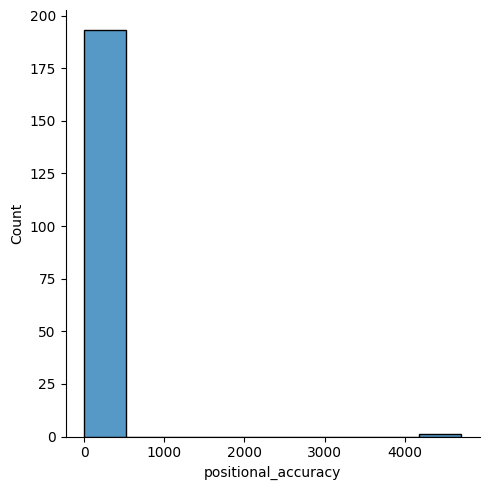

In [87]:
sns.displot(data =flowers_two['positional_accuracy'])

In [88]:
Output = pd.merge(flowers_two, buds_two, how='outer')
Output = pd.merge(Output, fruits_two, how='outer')
Output = pd.merge(Output, No_Evidence_two, how='outer')


In [99]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import StaleElementReferenceException
import urllib.request

In [104]:
# to run Chrome in headless mode
#options = Options()
#options.add_argument("--headless") # comment while developing

# initialize a Chrome WerbDriver instance
# with the specified options


image_urls =[]

for i in range(len(Output)):
    #driver.get(Output['image_url'][i])
    image_urls.append(Output['image_url'][i])
    
    #driver.save_screenshot(f'./photos/{Output["id"][i]}.medium.jpeg')
#image_html_nodes = driver.find_elements(By.CSS_SELECTOR, "[data-test=\"photo-grid-masonry-img\"]")


In [105]:
print(image_urls)

['https://inaturalist-open-data.s3.amazonaws.com/photos/202173677/medium.jpg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/203241955/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/203242192/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/203242303/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/209222696/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/211059585/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212284229/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212285160/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212285198/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212285243/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212978453/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212978525/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/phot

make dir photos

In [114]:
Output = Output.dropna(subset=['public_positional_accuracy'])

In [115]:
missing_values(Output)

Column			% missing
-----------------------------------


id                               0
time_observed_at                 0
time_zone                        0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
positional_accuracy              0
public_positional_accuracy       0
phenology                        0
dtype: int64

In [116]:
Output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 0 to 462
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             454 non-null    int64  
 1   time_observed_at               454 non-null    object 
 2   time_zone                      454 non-null    object 
 3   image_url                      454 non-null    object 
 4   num_identification_agreements  454 non-null    int64  
 5   latitude                       454 non-null    float64
 6   longitude                      454 non-null    float64
 7   positional_accuracy            454 non-null    float64
 8   public_positional_accuracy     454 non-null    float64
 9   phenology                      454 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 39.0+ KB


In [126]:
from PIL import Image

In [127]:

image_name_counter = 1

# download each image and add it
# to the "/images" local folder
for image_url in image_urls:
  file_name = f"./photos/{image_name_counter}.png"
  print(f"downloading image no. {image_name_counter} ...")

  
  # download the image
  urllib.request.urlretrieve(image_url, file_name)

  print(f"images downloaded successfully to \"{file_name}\"\n")

  # increment the image counter
  image_name_counter += 1

downloading image no. 1 ...
images downloaded successfully to "./photos/1.png"

downloading image no. 2 ...
images downloaded successfully to "./photos/2.png"

downloading image no. 3 ...
images downloaded successfully to "./photos/3.png"

downloading image no. 4 ...
images downloaded successfully to "./photos/4.png"

downloading image no. 5 ...
images downloaded successfully to "./photos/5.png"

downloading image no. 6 ...
images downloaded successfully to "./photos/6.png"

downloading image no. 7 ...
images downloaded successfully to "./photos/7.png"

downloading image no. 8 ...
images downloaded successfully to "./photos/8.png"

downloading image no. 9 ...
images downloaded successfully to "./photos/9.png"

downloading image no. 10 ...
images downloaded successfully to "./photos/10.png"

downloading image no. 11 ...
images downloaded successfully to "./photos/11.png"

downloading image no. 12 ...
images downloaded successfully to "./photos/12.png"

downloading image no. 13 ...
image

In [159]:
npimgs = []
rwimgs = []
count = 1
for image_url in image_urls:
    image = Image.open(f'./photos/{count}.png')
    image.save(f'./photos/{count}.png', format='PNG')
    rwimgs.append(image)
    npimgs.append((np.array(image)).shape)
    count += 1



(500, 281, 3)

In [131]:
import tensorflow as tf

In [173]:
print(npimgs)

[(500, 281, 3), (438, 500, 3), (466, 500, 3), (500, 493, 3), (375, 500, 3), (500, 441, 3), (500, 446, 3), (347, 500, 3), (252, 500, 3), (284, 500, 3), (489, 500, 3), (500, 468, 3), (500, 463, 3), (496, 500, 3), (337, 500, 3), (394, 500, 3), (439, 500, 3), (251, 500, 3), (456, 500, 3), (500, 469, 3), (454, 500, 3), (486, 500, 3), (393, 500, 3), (500, 495, 3), (493, 500, 3), (485, 500, 3), (500, 366, 3), (484, 500, 3), (469, 500, 3), (448, 500, 3), (412, 500, 3), (385, 500, 3), (500, 469, 3), (386, 500, 3), (500, 452, 3), (333, 500, 3), (407, 500, 3), (496, 500, 3), (500, 399, 3), (500, 458, 3), (296, 500, 3), (427, 500, 3), (333, 500, 3), (356, 500, 3), (500, 389, 3), (500, 333, 3), (333, 500, 3), (333, 500, 3), (500, 377, 3), (500, 333, 3), (453, 500, 3), (458, 500, 3), (428, 500, 3), (355, 500, 3), (500, 417, 3), (500, 491, 3), (500, 355, 3), (500, 491, 3), (500, 349, 3), (294, 500, 3), (500, 447, 3), (301, 500, 3), (500, 422, 3), (500, 382, 3), (464, 500, 3), (333, 500, 3), (333, 500

In [143]:
class_names = ['flowers', 'buds', 'fruits', 'No Evidence', 'flowers and fruits', 'flowers and buds', 'buds and fruits','flowers, fruits and buds']  

In [179]:
Imgs = tf.npimgs

(train_images, train_labels), (test_images, test_labels) = Imgs.load_data()


AttributeError: module 'tensorflow' has no attribute 'npimgs'

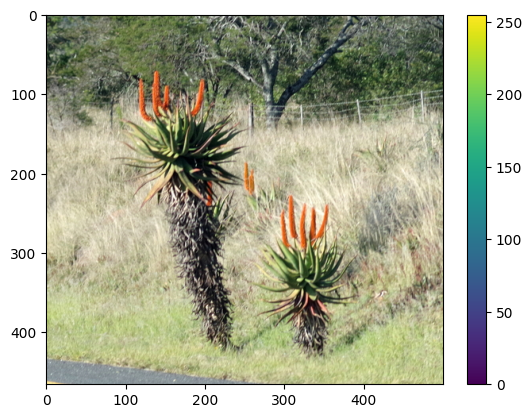

In [153]:
plt.figure()
plt.imshow(rwimgs[2])
plt.colorbar()
plt.grid(False)
plt.show()